## Spatial Variation in Irradiance

This notebook looks a little deeper into a concept that was introduced earlier in [02_solar_power_forecasts.ipynb](02_solar_power_forecasts.ipynb): spatial variance in irradiance, and resulting fleet power, which is based on the maximum and minimum irradiance in each grid cell from a downsampled ("coarsened") version of the HRRR. We used a 10x10 coarsening window, which results in approximately 30x30 km grids. 

This value is normalized as: (max-min)/clear sky. This is our first indicator of forecast uncertainty. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load previous timeseries DataFrames:

In [2]:
p_ac_hrrr_coarse_max_all = pd.read_pickle('example_data/p_ac_hrrr_coarse_max_all.pkl')
p_ac_hrrr_coarse_min_all = pd.read_pickle('example_data/p_ac_hrrr_coarse_min_all.pkl')
power_ac_cs_all = pd.read_pickle('example_data/power_ac_cs_all.pkl')

Normalize to clear sky power:

In [3]:
max_min_norm = (p_ac_hrrr_coarse_max_all-p_ac_hrrr_coarse_min_all)/power_ac_cs_all
max_min_norm = max_min_norm.dropna() # drop rows with nan to filter to time range of HRRR data

# At *very* low irradiance, sometimes HRRR reports higher than our clear sky model
# For intervals where clear sky power is less than 0.1% of max clear sky power, set
# normalized max-min power to zero
min_cs_filter = power_ac_cs_all < power_ac_cs_all.max()*.001
max_min_norm[min_cs_filter] = 0

max_min_norm.rename(columns={'power_ac':'max_min_norm'},inplace=True)

A quick plot:

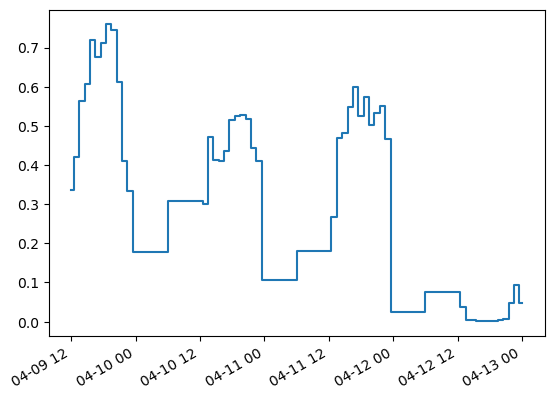

In [4]:
plt.plot(max_min_norm.index, max_min_norm.max_min_norm,drawstyle='steps-mid')
plt.gcf().autofmt_xdate()
plt.show()

And let's save the DataFrame for use later:

In [5]:
max_min_norm.to_pickle('example_data/max_min_norm_20210408.pkl')

Next, we will look at our second indicator of forecast uncertainty, which comes from the NOAA GEFS, an ensemble forecast model: [05_ensemble_variation_in_cloud_cover.ipynb](05_ensemble_variation_in_cloud_cover.ipynb).